<a href="https://colab.research.google.com/github/araomv/NormalizingFlow-Tutorial/blob/master/Normalizing_flow_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tutorial on Normalizing Flows:**


This a tutorial is based on [Normalizing Flows for Probabilistic Modeling and Inference](https://arxiv.org/pdf/1912.02762.pdf) (covers only few parts of the paper). 

We use 1D or 2D examples for visualization.

***pre-requisite ***

*   Should know what is a probality distribution
*   Some basics of pytorch/tf/ keras
*   Generating random numbers in python
*   Should be able to unmute and attempt to answer/ask some questions 😄  

**disclaimer:**
> Please be aware of bold and non-bold font for the vector/scalar.

> Spelling mistakes.

> Questions to audience is indicated by 🤔.  (audience will be picked at random using rand function)** 😄 

**Why should i understand it?**

https://openai.com/blog/glow/









# Part 1: Generative Models

**“What I cannot create, I do not understand.”**

—Richard Feynman

### Notations


> We indicate the random variable of input as $\mathcal{X}$, realizations of this random variable is indictaed by $x$.

> The samples are indicated by $\{x_i\}_{i=1}^M$. 

>$p(x)$ indicates the probability distribution of $x$ ($P_\mathcal{X}(x)$), 

> Each $x_i$ is of dimension $D$ ($x_i\in R^d$). 

>$x^s$ indicate subset of the vector $x$ and $x \backslash x^s$ set complement of the $x^s$. In this note, 

> We consider only the iid samples. 

> **We deal with only continues values in this tutorial**

### Short introduction to GM



> Generally there are two kind of models used in ML: discriminative models and generative models. 

> **There are several main properties are important for a GM. Some of them are listed below.** 


1.   It should be able to model arbitrary distribution.
2.   Given $x_{sample}$ the model should be compute $p(x_{sample})$.
3.   .Able generate a samples from $P(x)$.
4.   scoring: Compute the marginal distribution $P(x_s)$ and/or $P(x_s|x\backslash x_s)$

**Please note that, not all generative models (application) will satisfy (requires) all of these properties. There can be application specific goals for a generative model(ex: Natural image generation should produce image that the human visual system like).**

### (High level) Applications of GM






1.   Supervised/semi supervised learning
2.   Missing value problem
3.   Outlier detection
4.   Generate more data for discriminative models
5.   Abstract arithmetic. 

### Some examples




1.   Gaussian distribution
2.   GMM
3.   Probablistic graphical models
4.   Variational Auto encoders (VAEs)       [2013]
5.   Generative Adversial Networks (GANs).  [2014] MOST FAVORITE 
6.   Normalizing flows (FLOWs).             [2015]


# Part 2: Generating random numbers and visualizing their distributions.

Please notice the rang of x and y axis (Not the size of the plot)



### 1D

> $y = \mathcal{U}(0,1)$

> $z = \mathcal{N}(0,1)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y=np.random.rand(1000);
plt.hist(y,20)

In [ ]:
z=np.random.randn(1000)
plt.hist(z,20)

### 2D
Let $\mathbf{v}$ be a 2D vector with componenets denoted by $v_1$ and $v_2$



> $y_1 = \mathcal{U}(0,1),y_2 = \mathcal{U}(0,1)$

> $z_1 = \mathcal{N}(0,1), z_2 = \mathcal{N}(0,1)$

> $\mathbf{z} = \mathcal{N}(0,\Sigma), \Sigma=\left[\begin{smallmatrix} 2&0.9\\ 0.9&1 \end{smallmatrix} \right]$

In [ ]:
y1=np.random.rand(1000,1);y2=np.random.rand(1000,1); y=np.concatenate((y1,y2),axis=1);
plt.scatter(y1,y2)

In [ ]:
z1=np.random.randn(1000,1);z2=np.random.randn(1000,1); z=np.concatenate((y1,y2),axis=1);
plt.scatter(z[:,0],z[:,1])

In [ ]:
mu=np.zeros(2)
Sigma=np.array([[1,0.9],[0.9,2]])
z=np.random.multivariate_normal(mu,Sigma,1000);
plt.scatter(z[:,0],z[:,1])

### Transforming the variables (1D). (what happens to their distribution)
> $w=y+5.0$       (what will be the range $w$?) 🤔

> $w=2y-2.0$      (what will be the range $w$?) 🤔



In [ ]:
y=np.random.rand(1000);
plt.subplot(121);plt.hist(y,20);
y=np.random.rand(1000);
plt.subplot(122);plt.hist(2*y+5.0,20)

In [ ]:
y=np.random.rand(1000);
plt.subplot(121);plt.hist(y,20);
y=np.random.rand(1000);
plt.subplot(122);plt.hist(2*y-2.0,20)

### Transforming the variables (2D). (what happens to their distribution)
> $\mathbf{w}=\mathbf{z}*2$

> $\mathbf{w}=G\mathbf{z}$

>$\mathbf{w}=\sigma{(a_1 z+b_1)}+\sigma{(a_2 z+b_2})$

In [ ]:
z=np.random.multivariate_normal(mu,Sigma,1000);
plt.subplot(121);plt.scatter(z[:,0],z[:,1])
z=np.random.multivariate_normal(mu,Sigma,1000);
r=2*z
plt.subplot(122);plt.scatter(r[:,0],r[:,1])

In [ ]:
Sigma=np.array([[1,0.9],[0.9,2]])
z=np.random.multivariate_normal(mu,Sigma,1000);
G=np.array([[1,-0.8],[-0.8,1]])
r=np.matmul(G,z.transpose())
plt.subplot(121);plt.scatter(z[:,0],z[:,1])
z=np.random.multivariate_normal(mu,Sigma,1000);
r=np.matmul(G,z.transpose())
plt.subplot(122);plt.scatter(r[0,:],r[1,:])

In [ ]:
def sigmoid(x,a,b):
  return 1 / (1 + np.exp(-a*x+b))
Sigma=np.array([[1,0.0],[0.0,1]])
z=np.random.multivariate_normal(mu,Sigma,1000);
w=(sigmoid(z,2,-1)+sigmoid(z,3,1))/2;
plt.subplot(121);plt.scatter(z[:,0],z[:,1])
plt.subplot(122);plt.scatter(w[:,0],w[:,1])

In [ ]:
def sigmoid(x,a,b):
  return 1 / (1 + np.exp(-a*x+b))

Sigma=np.array([[1,0.0],[0.0,1]])
z=np.random.multivariate_normal(mu,Sigma,1000);
w=(sigmoid(z,20,-15)+sigmoid(z,20,10))/2;
plt.subplot(121);plt.scatter(z[:,0],z[:,1])
plt.subplot(122);plt.scatter(w[:,0],w[:,1])

# Part 3: Basics of Normalizing flows

## Definitions and notations


> $\mathbf{x}=T^{\phi}(\mathbf{u})$, 

> where $u\sim p^{\psi}_u(\mathbf{u})$ --> base distribution

> **If T is invertible** --> $T^{-1}$ is exits --> its map

> $u=T^{-1}(x)$

>$p_x(\mathbf{x})=p_u(\mathbf{u})|det(J_T(\mathbf{x}))|$, where $u=T^{-1}(x)$
> proof can be found in "[Functions of random variables](https://en.wikipedia.org/wiki/Random_variable#:~:text=Random%20variables%20can%20be%20discrete,an%20interval%20or%20collection%20of)".

> $\boxed{p_x(\mathbf{x})=p_u(T^{-1}(\mathbf{x}))|det(J_T(\mathbf{x}))|}$

> $\{J_T(\mathbf{x})\}_{ij}=\frac{\partial T_i}{\partial x_j}$

> Deteminant quantifes the relative change of volume of a small neighbourhood around $\mathbf{u}$ due to T.

> Composition $(T_1 \odot T_2)$ can be use build vary complex invertible functions. (multi-layer of the invertible layer).  

> Deteminants also are product of the two componenets. $det(J_{(T_1 \odot T_2)}(\mathbf{u}))=det(J_{T_1}(u)). det(J_{T_2}(T_1(u))$

>$T=T_K \odot\dots\odot T_1$, where $T_k$ transforms from $z_{k-1}$ to $z_k$

> $z_0=u$ and $z_K=x$

<font color='red'>**Main features [2nd and 3rd main property of the generative model]**</font>

1.  Sampling from the model
2.  Evaluating the model's density





## Short Proof of Expressive Power [1st main propery]


> Suppose $p(\mathbf{x})>0$

>$p_x(x)=\prod_{i=1}^D p_x(x_i|x_{<i})$    ==> $p(x_1,x_2,x_3)=p(x_1)p(x_2|x_1)p(x_3|x_1,x_2)$

>Lets define a **vector valued function** $F: x \rightarrow z $

> Now consider the i-the component of the function to be $F_i(x_i|x_{<i})= \int^{x_{i}}_{-\infty} p_x(x_{i}^{'}|x_{<i}) dx_{i}^{'}=Pr(x_{i}^{'}<x_i|x_{<i})$

> To find the distribution of $z$ under the mapping $F$, we need to find jocobian of the mapping (function is invertible.. **WHY?**)

>Jocobian is a lower triangualr matrix because $J_{ij}=\frac{\partial F_i}{\partial x_j}=0$ when $i<j$. 

> determinant is product of diagonal entries $det(J)=\prod_i \frac{\partial F_i}{\partial x_i}=\prod_i p_x(x_i|x_{<i})=p(x)$

> $p_z(z)=p_x(x) |det(J)|^{-1}=1$. **Think about what is the range $F$ or possible values for $z$?**  🤔

><font color='red'> ***What does this tell us about modeling any distribution?***  🤔

> Does this hold if the $p_u(u)=\mathcal{N}(0,I)$?</font>  🤔




## Model training:


> $\mathbf{x}=T^{\phi}(\mathbf{u})$, 

> where $u\sim p^{\psi}_u(\mathbf{u})$ --> base distribution

> **If T should be invertible** 

> Use a very simple distribution such as normal distribution for $u$ and model the data distribution. 

>$p_x(\mathbf{x})=p_u(\mathbf{u})|det(J_{T^{-1}}(\mathbf{x}))|$

> **GOAL** is to find the parameters $\theta=\{\phi,\psi\}$.

> Let the underlying distribution be $p^g(x)$ and the $p_x(x;\theta)$ be the distribution modeled by the flows.

> Two popular way to train the model is KL divergence (forward and reverse). 


><font color='red'>**SPOILER: Both are equivalent and applicable in different scenarios. **</font>


> $KL^f(p||q)=E_p[\;log(\frac{p}{q})]$

1.   Forward KL
      
      >$D^f_{KL}[p^g(x) || p_x(x;\theta)]=-E_{p^g(x)}[log(p_{x}(x);\theta)]+const=-E_{p^g(x)}[\log(p_u(T^{-1}(x)))+\log(|det(J_{T^{-1}}(x)))]$

      > expectation is approximated by emperical sumation given the samples from the $p^g(x)$.

      > If $u \sim \mathcal{N}(0,I)$, then $log(p_u(T^{-1}(x)))=-T^{-1}(x)^t T^{-1}(x)$

      > Gradient with respect to $\theta$ can be computed.
2.   Reverse KL

    > $D^r_{KL}[p_x(x;\theta) || p^g(x)]= E_{p_u}[log(p_u(u))-log(|det(J_T(u))|)-log(p_g(T(u)))]$

    > No need samples from the underlying process, should be able to evaluate the probablisty given data point $p_g(r)$ (upto a constant).




### Model inference: 
1. How do we sample from the distribution?
2. How do evaluate the likelyhood of the sample $x_{sample}$?

##  General Implementation structure of Normalizing flow



###  Gaussian (mixture) distribution Demo: 
> $p(x)=\mathcal{N}(5.0,2.0)$

> $p(x)=0.6\mathcal{N}(1.0,0.6)+0.4 \mathcal{N}(4,1.3)$

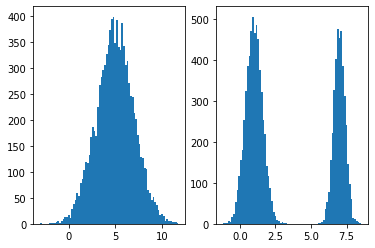

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def GetSampleDataG(nsamp=1):
    y=2.0*np.random.randn(nsamp)+5.0;
    return y

def GetSampleDataGMM(nsamp=1):
    ymix1=np.random.randn(nsamp)*0.6+1;
    ymix2=np.random.randn(nsamp)*0.4+7;
    alpha=np.random.binomial(1,0.4,nsamp);
    y=(alpha==0)*ymix1+(alpha==1)*ymix2;
    return y

y=GetSampleDataG(nsamp=10000)
ymm=GetSampleDataGMM(nsamp=10000)
plt.subplot(121);plt.hist(y,80);
plt.subplot(122);plt.hist(ymm,80);

**Lets define very simple invertible function.**

$u=T^{-1}(x)=cx+b$    and    **($c\ne 0$ WHY?)**

$u=e^a x+b$,  where $a\in R$

$x=T(u)=\frac{u}{e^a}-\frac{b}{e^a}$

$p_u(u)=\mathcal{N}(0,1)=C e^{-0.5u^2}$

$J_{T^{-1}}(x)=a$

$\mathcal{D}=-E_{p^g(x)}[\log(p_u(T^{-1}(x)))+\log(|det(J_{T^{-1}}(x))|)]$

$=-\sum_{k=1}^N [-0.5u_k^2+\log(|a|)]$

$=\sum_{k=1}^N [0.5(ax_k+b)^2-\log(|a|)]$

------params before training--------
[Parameter containing:
tensor([[-0.8434]], requires_grad=True), Parameter containing:
tensor([[-0.0088]], requires_grad=True)]
------params after training--------
[Parameter containing:
tensor([[-0.7033]], requires_grad=True), Parameter containing:
tensor([[-2.4982]], requires_grad=True)]


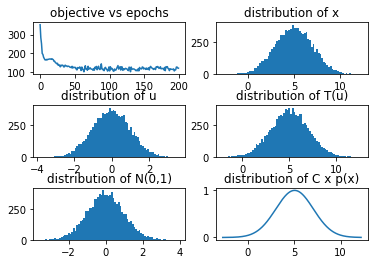

In [ ]:
######### Import the packages   ######
import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm
torch.manual_seed(1337)
np.random.seed(3459)
torch.autograd.set_detect_anomaly(True)

######### Define your Data Sampling function   ######
#GetSample=GetSampleDataGMM;
bsz=100;
GetSample=GetSampleDataG;
################ Simple invertible affine transform layer  ############
class AffineTransform(nn.Module):
    def __init__(self):
        super(AffineTransform, self).__init__()
        self.a = torch.nn.Parameter(data=torch.Tensor(1, 1), requires_grad=True)
        self.b = torch.nn.Parameter(data=torch.Tensor(1, 1), requires_grad=True)
        self.a.data.uniform_(-1, 1)
        self.b.data.uniform_(-1, 1)
    
    def forward(self, xx):
        out=torch.exp(self.a)*xx+self.b;  #contraining the coef to be non negetive by using exp()
        log_det=-xx.shape[0]*torch.log(torch.exp(self.a))
        prior=0.5*torch.sum(out*out)
        return out,prior,log_det  # return output, log determinant and the llk wrt to the prior.

    def sample(self, nsamp):
        xx=torch.tensor(np.random.randn(nsamp))
        return (xx-self.b)/torch.exp(self.a)

    def GetLLK(self, xx):
        out=torch.exp(self.a)*xx+self.b;  #contraining the coef to be non negetive by using exp()
        log_det=-xx.shape[0]*torch.log(torch.exp(self.a))
        prior=0.5*torch.sum(out*out,dim=0)
        return prior

################ Model Definition  ############
num_epoch = 200;
model = AffineTransform();
params = list(model.parameters())
optimizer = optim.Adam(model.parameters(), lr=1e-1)
print('------params before training--------')
print(params)

################ Model Training  ############
model.train()
loss_np=np.zeros(num_epoch);
for k,kk in enumerate(range(num_epoch)):
    x = GetSample(bsz)
    x=torch.tensor(x.astype('float32'))
    zs, prior_logprob, log_det = model(x)
    logprob = prior_logprob + log_det
    loss = torch.sum(logprob) # NLL
    loss_np[k]=loss.item()
    model.zero_grad()
    loss.backward()
    optimizer.step()

################ Ploting results ############
params = list(model.parameters())
print('------params after training--------')
print(params)

plt.subplot(321)
plt.plot(loss_np)
plt.title('objective vs epochs')

xnp=GetSample(10000);
x=torch.tensor(xnp.astype('float32'))
model.eval()
y=model(x);
z=y[0].detach().numpy()

plt.subplot(322)
plt.hist(xnp,80);
plt.title('distribution of x')

plt.subplot(323)

plt.hist(z[0,:],80);
plt.title('distribution of u')


plt.subplot(325)

plt.hist(np.random.randn(10000),80);
plt.title('distribution of N(0,1)')

plt.subplot(324)
ysamp=model.sample(10000).detach().numpy();
plt.hist(ysamp[0,:],80);
plt.title('distribution of T(u)')

plt.subplot(326)
maxv=np.max(xnp)
minv=np.min(xnp)
xnp=np.arange(minv,maxv,0.01)
x=torch.tensor(xnp.astype('float32'))
y=model.GetLLK(x).detach().numpy();
z=np.exp(-y)
plt.plot(xnp,z);
plt.title('distribution of C x p(x)')

plt.subplots_adjust(hspace=0.6)

In [ ]:
c,d=np.exp(list(model.parameters())[0].detach().numpy()),list(model.parameters())[1].detach().numpy()
a,b=1/c,-d/c
print([a,b])

[array([[2.0204225]], dtype=float32), array([[5.0473995]], dtype=float32)]


### Non-linear mapping

**Its clear that the GMM case the affine transform is not sufficient..!**

what if the mapping is

$u=T^{-1}(x)=\sum_{m=1}^K w_k \sigma(v_k x+b)$  and $v_k,w_k>0$

$J_{T^{-1}}(x)=\sum_{m=1}^K w_k v_k \sigma(v_k x+b_k)(1-\sigma(v_k x+b_k))$




V [[2.4360259]
 [5.8589168]]
W [[3.411924 ]
 [3.1231105]]
b1 tensor([[18.3868],
        [ 2.2012]])
b2 tensor([[-3.5550]])


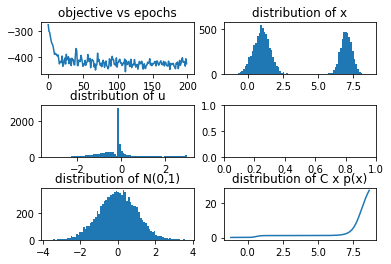

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

torch.manual_seed(1337)
np.random.seed(3459)
torch.autograd.set_detect_anomaly(True)
bsz=100;
GetSample=GetSampleDataGMM;
################ Lets define layer for liner combination of sigmoid #########
class CombSigmoid(nn.Module):
    def __init__(self,nunits=4):
        super(CombSigmoid, self).__init__()
        self.V = torch.nn.Parameter(data=torch.Tensor(nunits, 1), requires_grad=True)
        self.W = torch.nn.Parameter(data=torch.Tensor(nunits, 1), requires_grad=True)
        self.b1 = torch.nn.Parameter(data=torch.Tensor(nunits, 1), requires_grad=True)
        self.b2 = torch.nn.Parameter(data=torch.Tensor(1, 1), requires_grad=True)
        self.V.data=torch.from_numpy(np.array(np.log(2)*np.ones((2,1),dtype='float32')));
        self.W.data=torch.from_numpy(np.array(np.log(0.5)*np.ones((2,1),dtype='float32')));
        self.b1.data=torch.from_numpy(np.array([15,2]).astype('float32')[:,np.newaxis]);
        self.b2.data=torch.from_numpy(np.array(np.zeros((1,1),dtype='float32')));

    def forward(self, x):
        v=torch.exp(self.V);
        w=torch.exp(self.W);
        i1=torch.sigmoid(-v*x+self.b1);
        out=torch.mm(w.transpose(1,0),i1)+self.b2;
        log_det=-x.shape[0]*torch.log(torch.sum(i1*(1.0-i1)*v*w))
        #log_det=torch.sum(i1*(1.0-i1)*v*w);
        prior=0.5*torch.sum(out*out)
        return out,prior,log_det

   # def sample(self, nsamp):
        #bijection search
        #NOT IMPLEMENTED NOW

    def GetLLK(self, x):
        v=torch.exp(self.V);
        w=torch.exp(self.W);
        i1=torch.sigmoid(-v*x+self.b1);
        out=torch.mm(w.transpose(1,0),i1)+self.b2
        prior=0.5*torch.sum(out*out,dim=0)
        return out

num_epoch = 200;
################ Model Definition  ############
model = CombSigmoid(2);
params = list(model.parameters())
optimizer = optim.Adam(model.parameters(), lr=1e-1)

################ Model Training  ############


model.train()
loss_np=np.zeros(num_epoch);
for k,kk in enumerate(range(num_epoch)):
    x = GetSample(bsz)
    x=torch.tensor(x.astype('float32'))
    zs, prior_logprob, log_det = model(x)
    logprob = prior_logprob + log_det
    loss = torch.sum(logprob) # NLL
    loss_np[k]=loss.item()
    model.zero_grad()
    loss.backward()
    optimizer.step()

for ix,(name,p) in enumerate(model.named_parameters()):
  if(ix>1):
    print(name,p.data)
  else:
    print(name,np.exp(p.data.detach().numpy()))

################ Ploting results ############
plt.subplot(321)
plt.plot(loss_np)
plt.title('objective vs epochs')

xnp=GetSample(10000);
x=torch.tensor(xnp.astype('float32'))
model.eval()
y=model(x);
z=y[0].detach().numpy()

plt.subplot(322)
plt.hist(xnp,80);
plt.title('distribution of x')

plt.subplot(323)
plt.hist(z[0,:],80);
plt.title('distribution of u')

plt.subplot(325)
plt.hist(np.random.randn(10000),80);
plt.title('distribution of N(0,1)')

plt.subplot(324)
#ysamp=model.sample(10000).detach().numpy();
#plt.hist(ysamp[0,:],80);
#plt.title('distribution of T(u)')

plt.subplot(326)
maxv=np.max(xnp)
minv=np.min(xnp)
xnp=np.arange(minv,maxv,0.01)
x=torch.tensor(xnp.astype('float32'))
y=model.GetLLK(x).detach().numpy();
z=np.exp(-y[0,:])
plt.plot(xnp,z);
plt.title('distribution of C x p(x)')
plt.subplots_adjust(hspace=0.6)

In [ ]:
xnp=GetSample(10000);
x=torch.tensor(xnp.astype('float32'))
model.eval()
y=model(x);
y[2].detach().numpy()

array(-75539.78, dtype=float32)

### Challenges in real data




***The idea of the flows is simple. But the naive ideas can be computationally expensive. Most literature deals with computing the various qualtities efficiently, so that it can be scaled to real dataset. ***


1. The invertible function should be easy to compute (including the inverse)
    > What is the right way to come with the invertible functions and that should have universal approximation properties. 

    > Still there is no formal way of designing a invertible function. Onlyway is to form a simple invertible functions and compose them to get more complex functions. 

2. Jacobian must be easy to compute.
    >  For example lets consider a task of modeling 10s audio at 44000 samples per second. D=440000 ==> J has ~20B values ==> computing the det is $O(D^3)$=8.5184e+16 operations...! 

    >  The invertible function is designed such a way that the Jacobia matrix is diagonal and hence determinant computation complexity is O(D).  ==> Tractable..

### Summary





> FLOW is

  1.   $\mathbf{x}=T^{\phi}(\mathbf{u})$
  2.   $u\sim p^{\psi}_u(\mathbf{u})$
  3.   T is invertible, ( or $T^{-1}$ is invertible)

>Training need 

  1. samples of training data.
  2. $T^{-1}(x)$ should be **computable**.
  3. $|det(J_{T^{-1}}(x))|$ should be **computable**.

> For density evaluation:   $p_u(T^{-1}(x^{test}))$

> For sampling from distribution $z\sim p_u(u)$ and $x^{sample}=T(z)$

> Things to keep in mind:

1.   Approximation property of $T$.
2.   Efficiency of jacobian computation.

# Part 4: Types of flows



1.   Autoregressive flows
2.   Linear fows
3.   Residual flows
4.   Continues flows


Here we briefly review the Autoregressive flows.


## Autoregressive Flows

### Basics and notations

> From the proof of expresivity we saw that any distribution can be mapped to uniform distribution using the function $F$ ==> $z_i=F_i(x_i|x_{<i})= \int^{x_{i}}_{-\infty} p_x(x_{i}^{'}|x_{<i}) dx_{i}^{'}=Pr(x_{i}^{'}<x_i|x_{<i})$

>$F$ is a vector values function with vector arguments. 

>$F_i$ can be thought as 1D function ($x_i$) with parameters $x_{<i}$. **(Note that $F_i$ is a CDF and hence should be monotonically increasing wrt $x_i$)**.







### Auto regressive flow construction


> $z_{i}^{'}=\tau(z_i;h_i)$ and $h_i=c_i(z_{<i})$   (transformer and conditioner pair), $i$ varies from 1 to $D$. 

> $\tau$ is 1D function with parameters $h_i$

> $c_i$ has the parameters to be trained.  

> **Constraints:** $\tau$  should be strictly monotonic, conditioner need not be invertible.

> Easy to verify the invertiblity:
      > $z_i=\tau^{-1}(z_i^{'};h_i)$ where $h_i=c_i(z_{<i})$

> Pictorial representation:


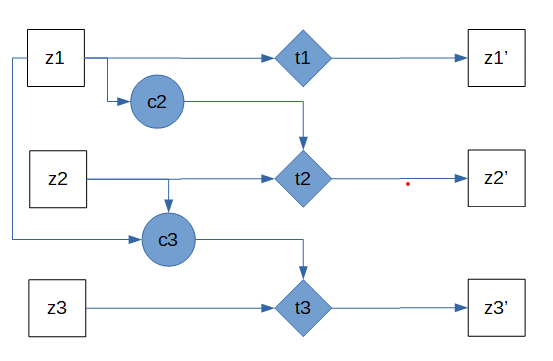


> **This solves the construction of invertible function..!**

> *What about the jacobian?*   $\frac{\partial F_i}{\partial x_j}=\frac{\partial z^{'}_{i}}{\partial z_j}$  🤔

> What about approximation properties? 🤔

### Implementing the transformer






1.   Affine autoregressive flows:   

      >$\tau(z_i;h_i)=\alpha_{i}z_i+\beta_i$,  where $h_i=\{\alpha_i,\beta_i\}$   
2.   Non-affine neural transformers:   
>$\tau(z)=\sum_k w_k \tau_k(z)$,   where $w_k>0$ and $\tau_k$ can be any monotnic function. 
3.   Integration-based transformers
>$\tau(z_i;h_i)=\int_{0}^{z_i} g(z;\alpha_i) dz+\beta_i$, where $g()$ is any positive valued function.

### Implementing the conditioner

**Note the each conditioner $c_i (1\le i \le D)$ accepts different dimentional input.**

> It can be a arbiraty neural net for each conditioner (D number of neural ntworks). But scales poorly with dimention D. (Remeber the audio example D=440k)

> It might be good idea to implement all $c_i$ using only one network:
1.   Recurrent autoregressive flows:   $h_i=c(s_i)$ and $s_i=RNN(s_{i-1},z_i)$
2.   Masked autoregressive flows:   $h=f(z)$ and Mask the appropriate weights (to satisfy the $<i$ constraint)
3.   Coupling layers:  We will have a seperate presentation about this..! [MOST POPULAR ONE]



### Examples (NOT TODAY)

# Part 5: Applications



1.   Probabilistic modeling
        >Density estimation

        >Generation (Audio, images, video)
        
2.   Inference
        > Importance and rejection sampling

        > Reparameterizing models for MCMC

        > Variational inference

        > Likelihood-free inference

3.   Using flows for representation learning


Inpainting: https://arxiv.org/pdf/1410.8516.pdf (page 9)

Power of $u$ : https://openai.com/blog/glow/



# References




1.   Normalizing Flows for Probabilistic Modeling and Inference [most important ref are here]  **[We have covered only 20% of this]**
2.   Glow: Generative Flow with Invertible 1x1 Convolutions
3.   WaveGlow: A Flow-based Generative Network for Speech synthesis
4.  NICE: Non-linear independent components estimation. [coupling layer]
5.  Density estimation using Real NVP [coupling layer]

